<a href="https://colab.research.google.com/github/cstecker/politicsRLab/blob/main/In%20welcher%20Blase%20bin%20ich%20denn%20hier%20gelandet%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In welcher Blase bin ich hier eigentlich?**
Zum Einstieg wollen wir mit ein paar einfachen Analysen loslegen. Am besten schauen wir uns erstmal die Damen und Herren etwas genauer an, die mit uns in der Vorlesung sitzen. 

Dazu nutzen wir google-colab. Es erlaubt uns, das Statistikprogramm R zu nutzen ohne das wir uns mit der Installation oder Paketeverwaltung ausführlich beschäftigen müssen. Sie können alles aber auch wie die Profis auch in R-Studio implementieren. Weitere Infos dazu finden Sie hier: [LINK](http://chrstecker.de/teaching/ein-appetizer-fuer-die-datenanalyse-mit-r/)



**Alle Befehle bzw. Code-Schnipsel können Sie mit *Strg+Enter* oder durch das klicken des Play-Buttons können passagenweise ausführen.** Darunter sehen Sie dann jeweils, welche Zeilen, mit welchem Ergebnis ausgeführt wurden. 

Laden wir uns zunächst die Library mit den Befehlen, die wir bei der Analyse benötigen. Libraries sind Bibliotheken von Befehlen.Das tidyverse ist eine ganze Sammlung von Paketen, die insbesondere von Hadley Wickham, geprägt wurden:

In [ ]:
library(tidyverse)

Nun laden wir uns den Datensatz zur Vorlesungsumfrage, mit dem wir weiter arbeiten wollen. (Der aufbereitete Datensatz wird auf github bereitgestellt. Die Details hierzu müssen uns erst einma nicht weiter kümmern).

In [ ]:
# Datensatz herunterladen -------------------------------------------------------------
download.file("https://github.com/cstecker/comparative_politics/blob/main/data/vpw2022-04.rds?raw=true", "survey.rds")

In [ ]:
# Datensatz in die Analyseplattform laden
survey <- readRDS("survey.rds")

Für einen ersten Blick auf die Daten geben wir ein:

In [ ]:
glimpse(survey)

Wir erhalten nun eine Auflistung aller Variablen mit weiteren Informationen. In der linken Spalte sehen wir die Variablen des Datensatzes. Jeweils rechts daneben steht eine kleine Übersicht über die Antworten der Studierenden. 

Schauen wir uns mal ein paar Charakteristiken unserer Kohorte an. Wie ist die Geschlechterverteilung hier im Kurs?

In [ ]:
count(survey, geschlecht)

Versuchen Sie *count* mal selbst, z. B. mit der Variable *party*!

Wir interessieren uns nun zunächst für die, sich als männlich identifizierenden, Studierenden. Dazu werfen wir alle anderen Studierenden aus dem Datensatz. Dazu nutzen wir *filter*.

In [ ]:
sample_male <- filter(survey, geschlecht == "Männlich")

Nun ist ein neues Objekt sample_male angelegt, das nur männliche Studierenden enthält (analog können Sie auch ein *sample_female* etc. anlegen). Mit *filter* haben Sie das erste Verb kennen gelernt, mit dem man die Daten bearbeiten kann (auch als data wrangling bezeichnet).

## **Wie würden die Kursteilnehmer abstimmen, wenn am nächsten Sonntag Bundestagswahl wäre?**

Nun sind wir neugierig, welche Parteien von den männlichen Studierenden präferiert werden. Diese Information ist in der Variable vote hinterlegt:

In [ ]:
count(sample_male, vote)

Es scheint, als wären wir in einer links-liberal neigenden Blase gelandet. Ein Blick auf aktuelle Umfragen legt nahe, dass der durchschnittliche Bundesbürger politisch etwas anders tickt als Sie und Ihre Kommillitoninnen und Kommillitonen.

Aber auch, wenn Sie zu den wenigen Konservativen im Kurs gehören, brauchen Sie sich keine Sorgen zu machen. Zum Glück respektieren sicher gerade an der Universität alle den fundamentalen Wert der Meinungsfreiheit und werden auch abweichenden Argumenten und Werthaltungen gegenüber respektvoll und aufgeschlossen sein. Sie brauchen auch nicht aus Höflichkeit über die politisch korrekten linksgrünen Scherze des Dozenten lachen. Er hat halt Marktforschung betrieben (Kursumfrage!) und will sich bei der Mehrheit anbiedern.

Wie sieht es denn unter den weiblichen Studierenden aus?

In [ ]:
survey %>% 
  filter(geschlecht == "Weiblich") %>% 
  count(vote) 

Die letzte Eingabe besteht aus mehreren Zeilen, die durch “%>%” verbunden sind. Dies ist eine sogenannte pipe, die Befehle verknüpft. Die pipe nimmt jeweils den Output der vorhergehenden Zeile als Input der nachfolgenden Zeile, hier: Nimm Dir den survey-Datensatz, dann filtere weibliche Studierende heraus, dann zähle ihre Parteipräferenzen. Wir werden die pipe nun immer nutzen, da man damit komplexe Befehlsketten sehr übersichtlich strukturieren kann.

Oft helfen Prozente dabei, relevante Unterschiede besser ersichtlich zu machen.

In [ ]:
survey %>% 
  filter(geschlecht == "Weiblich") %>% 
  count(vote) %>% 
  # Berechnen der Prozentanteile mit mutate, die neuen Variablen nennen wir dann totalvotes und share
  mutate(totalvotes = sum(n),
         share = n/totalvotes*100)

vote,n,totalvotes,share
<chr>,<int>,<int>,<dbl>
Bündnis90 / Die Grünen,15,30,50.000000
CDU,2,30,6.666667
Die Linke,2,30,6.666667
Ich würde nicht wählen,1,30,3.333333
SPD,7,30,23.333333
Sonstiges:,1,30,3.333333
Tierschutzpartei,1,30,3.333333
Volt,1,30,3.333333


Die Prozente haben wir mit *mutate* berechnet – dies ist das *tidyverse*-Verb zum Generieren neuer Variablen. Erst haben wir *totalvote* berechnet. Dies ist die Gesamtzahl aller Stimmen. Mit einem Komma abgetrennt, haben wir eine weitere Variable, *share* erstellt, die uns die Prozente ausgibt. Und wir haben gleich noch gelernt, dass man Kommentare mit einem anführenden # in den Code schreiben kann. Kommentieren Sie am besten immer ausführlicher als Sie es im Moment für notwendig erachten. Dann schauen Sie in vierzehn Tagen weniger ratlos auf den Code, den Sie vor vierzehn Tagen selbst flüssig heruntergeschrieben haben. Sie können nun die Geschlechter vergleichen, indem Sie einfach *filter(geschlecht == "Männlich")* beliebig befüllen.

Wenn Sie dies vertiefen wollen, lesen Sie sich dazu am besten auch das Kapitel in R for DataScience durch. Da wir R als Programmiersprache in Colab nutzen, lässt sich alles von dort auch hier anwenden!

Zurück zu den männlichen Studierenden: Eine Grafik sagt es meist besser als eine Tabelle, da die Informationen unmittelbar visuell beurteilt werden können. Füttern wir die Parteipräferenzen also in ein Balkendiagramm:

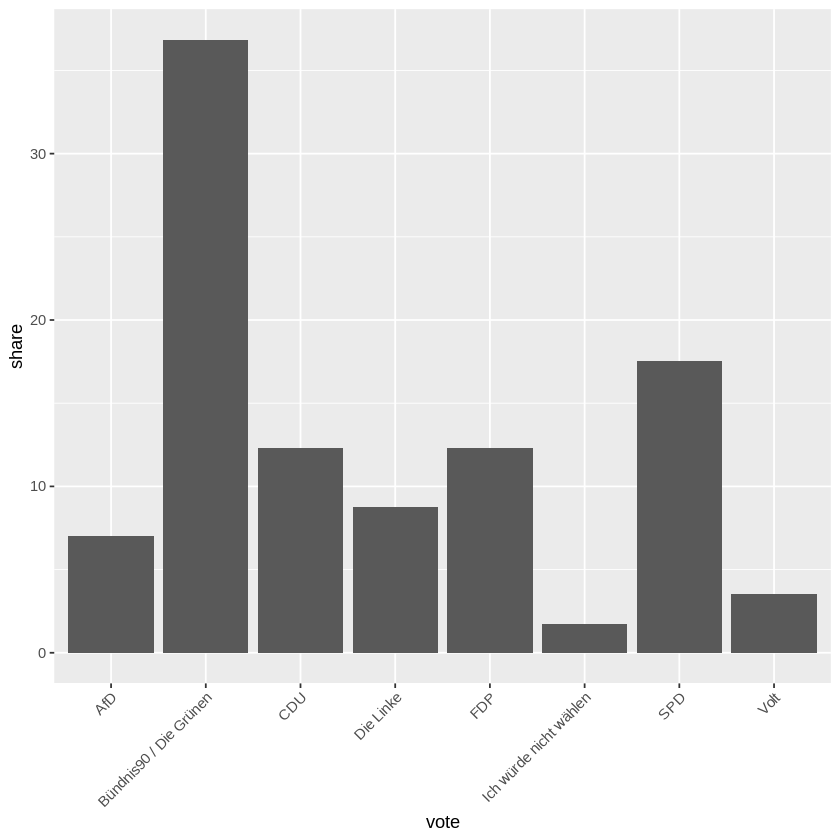

In [ ]:
sample_male %>% count(vote) %>% #Wir wollen die Anzahl der votes pro Partei aus dem Datensatz für männliche Studierende
  mutate(totalvotes = sum(n), #Wir erstellen erneut die Prozentvariable für diesen Datensatz
         share = n/totalvotes*100) %>% 
  ggplot() +
  geom_col(aes(x = vote, y = share)) + 
  scale_x_discrete(guide = guide_axis(angle = 45)) 

Mit dem Balkendiagramm haben wir ggplot2, das Visualisierungspaket im *tidyverse* kennengelernt. Mit “ggplot” wird der Grafikbefehl gestartet. Ab da weiß COlab, dass nun ggplot-Befehle kommen. Danach werden weitere ggplot-Befehle mit “+” verknüpft (Achtung: hier nicht “%>%” benutzen). Danach sagen wir Colab, welche Art des Graphs, das Geom, gezeichnet werden soll. Mit *geom_col* sagen wir Colab, dass die Daten als Balken (Columns) dargestellt werden sollen und konkretisieren in *(aes(x = vote, y = share))*, dass auf der x-Achse die unterschiedlichen Parteien und auf der y-Achse die Prozente bei der Sonntagsfrage abgebildet werden. Der letzte Abschnitt, *scale_x_discrete*, ist vorerst nicht wichtig zu verstehen, dient hier aber um die Namen der Parteien auf der x-Achse zu drehen, damit man sie besser zu lesen sind.

Lesen Sie sich dazu am besten auch das Kapitel in R for DataScience durch.

## **The Gender Gap in Voting: Evidence from the University of Darmstadt.**

Jetzt lernen wir noch ein weiteres ggplot-geom kennen und nutzen dies gleich für eine Forschungsfrage.
Als SozialwissenschaftlerInnen sind wir ständig auf der Suche nach Mustern und Erklärungen der politischen und sozialen Realität. Unser Datensatz erlaubt es uns, dass wir die Studierenden nach Geschlecht getrennt betrachten können, um eine Politikwissenschaftliche Theorie zu untersuchen. Der *Gender Gap in Voting* ist eine langanhaltende Diskussion in der Forschung, die Unterschiede im Wahlverhalten zwischen den Geschlechten untersucht. Viele Studien konnten dabei beobachten, dass weibliche Wählerinnen eher liberal und weniger konservativ wählen als männliche Personen. Ihr Wahlverhalten haben wir uns bereits angesehem, aber wir können schauen, ob sich die weiblichen Studierenden im “Links-Sein” von den männlichen Studierenden unterscheiden. In der Umfrage wurden Sie gebeten, sich auf einer allgemeinen “Links-Rechts-Achse” selbst einzuordnen. Diese Information ist in der Variablen lire_self hinterlegt. Die Verteilung der Variablen bilden wir nun mit einem density-plot ab und lassen uns die Werte für die Geschlechter getrennt darstellen. Wenn die Theorie wahr wäre, sollten wir beobachten, dass die männlichen unter ihnen eher rechte Werte auf der Skala wählen als weibliche Studierende.

Um die Geschlechter nun vergleichen zu können, erstellen wir eine Variable in der Studierenden der Wert *Male* zugeordnet wird, wenn sie männlich sind und der Wert *Female* wenn nicht. Dafür eignet sich der *ifelse* Befehl, wie der Name schon vermuten lässt.

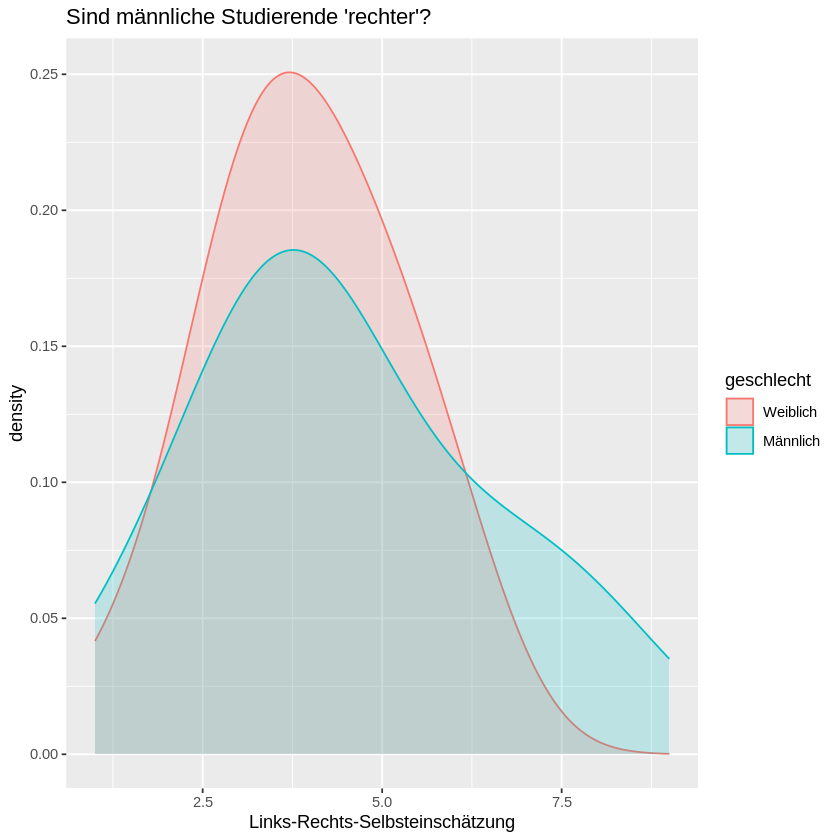

In [ ]:
survey %>%
  filter(geschlecht == "Weiblich"| geschlecht == "Männlich") %>% #Hier filtern wir Personen raus, die keine Angabe zum Geschlecht gemacht haben
  mutate(gender = ifelse(geschlecht == "Männlich","Male","Female")) %>%
  ggplot(aes(as.numeric(as.character(lire_self)), color = geschlecht, fill = geschlecht)) +
  geom_density(alpha = 0.2, adjust = 1.5) +
  labs(title = "Sind männliche Studierende 'rechter'?", 
       x = "Links-Rechts-Selbsteinschätzung") 

Der Modus beider Verteilungen lässt keine Bestätigung unserer Erwartung vermuten. Beide Geschlechter im Datensatz befinden sich eher links der Mitte und haben in etwa den selbst Modus. Jedoch zeigt sich bei den männlichen Studierenden, weniger normalverteilt sind, sondern eher eine linkssteile Verteilung aufweisen. Damit haben gibt es unter den Männern des Kurses mehr personen, die sich rechts der Mitte einordnen als die Frauen unter ihnen.  Wollen Frauen also eher eine liberale Politik? Liegt es daran, dass sie historisch bedingt eher zu post-materialistischen Werten (bspw. Fokus auf Familienpolitik) neigen? Damit sind wir schon mitten im Interview mit den Daten, die wir im Kurs einüben wollen.

Sie wissen jetzt auch, dass man mit *labs()* eine Abbildung und ihre Achsen beschriften kann.

Eine umfangreichere Auswertung der Umfrage finden Sie hier:

???

Die Grafiken sind etwas schicker (haben aber auch deutlich mehr Zeit gekostet). Im Laufe des Kurses werden wir die Schönheit und Aussagekraft der Grafiken auch stetig verbessern.

## **Lage- and Streuungsmaße**

Eine weitere Methode für einen Überblick über die Verteilung von Variablen sind Lage- und Streuungsmaße. Und diese zu veranschaulichen sehen wir uns die Variable *klim_self* an, welche eure Einstellung zum Klimaschutz misst. Dafür sehen wir uns in Tabellen-Form an, wie Wahl verteilt ist.

In [ ]:
table(survey$klim_self)


 1  2  3  4  5  6  7  8  9 10 11 
25 15 10  8  9  7  3  5  0  3  2 

Die obere Reihe gibt den Wert an und die untere Reihe zeig, wieviele von euch diese Kategorie gewählt haben. Mit dieser Ansicht kann man sehr gut den Modus erkennen. Denn der Modus ist ganz einfach die Kategorie, die am meisten gewählt wurde. Das ist in diesem Fall die 1. Das Klima vielen von euch entsprechend sehr wichtig!

Wie sieht es mit einem Durchschnittswert aus? Hier wird üblicherweise das arithmetische Mittel verwendet, welches sich mit *mean* berechnen lässt.

In [ ]:
mean(survey$klim_self)

Warning message in mean.default(survey$klim_self):
“argument is not numeric or logical: returning NA”


[1] NA

Hmm... das scheint nicht zu funktionieren. Was ist das los? Die Daten scheinen im Factor Format im Datensatz gespeichert zu sein. Das bedeutet, dass sie als Wörter verstanden werden und nicht als Zahlen. Aus einer 1 wird "1". Das müssen wir beheben, denn mit Factors kann man nicht rechnen. Die Zahlen müssen als numerische Werte verstanden werden.

In [ ]:
survey$klim_self <- as.numeric(survey$klim_self)
class(survey$klim_self) #Hat es funktioniert? Welche Klasse hat die Variable jetzt?

[1] "numeric"

In [ ]:
mean(survey$klim_self)

[1] NA

Nun bekommen wir nur ein NA. Das bedeutet meist, dass bestimmte Zellen im Datensatz keinen Wert enthalten. Meist heißt das, dass eine der befragten Personen zu dieser Frage keine Antwort gegeben hat. Diese Personen müssen wir entsprechend rausfiltern und den Datensatz neu abspeichern.

In [ ]:
survey <- survey %>% filter(!is.na(klim_self)) #is.na sorgt dafür, dass wir all Zellen mit NA gefiltert werden. Mit dem "!" sorgen wir dafür, dass genau diese Zellen nicht enthalten sind.
mean(survey$klim_self)

[1] 3.643678

Nun sehen wir, dass der Durschnittswert bei etwa 3.64 liegt. Auch dies deutet darauf hin, dass euch das Klima sehr am Herzen liegt.

Wir können uns diesen Wert und weitere auch mit dem Überblicks-Befehl, *summary*, ausgeben lassen.

In [ ]:
summary(survey$klim_self)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   3.644   5.000  11.000 

Was bedeuten die anderen Werte? Die anderen Werte beschreiben verschiedene Quartile. Zur Vereinfachung kann man dieses Wort wie folgt verstehen:
Würde man alle Antworten der größe nach aufreihen, dann wären Quartile eine Aufteilung dieser Aufreihung in vier gleichgroße Stücke. Der Wert "1st Qu." gibt entsprechend an, welcher Wert zwischen den ersten beiden Abschnitten liegt und somit die Grenze ausmacht. Der Median ist das 50% quartil, der Wert, der genau in der Mitte dieser Aufteilung liegt. Das "3rd Qu." liegt entsprechend bei 75% der Verteilung und gibt die grenzen zwischen dem dritten und dem vierten Abschnitt an. Dieses Maß gibt im Vergleich zum Durschnitt auch einen Überblick über die Verteilung der Werte.
Und zuletzt, "Min" gibt den geringesten und "Max" den höchsten Wert an.

Wie hoch ist die Spannweite zwischen dem ersten und dem dritten quartil? Als zwitschen 1 und 5? Klar, 4! Dieser Wert ist auch bekannt als Interquartilsabstand bekannt und hilft dabei die Streuung der Werte einschätzen zu können. Dies kann man ganz einfach mit *IQR* ausrechnen lassen.

In [ ]:
IQR(survey$klim_self)

[1] 4

Was noch? Ein weiteres, sehr wichtiges Maß ist die Standardabweichung. Zusammengefasst ist die Standardabweichung das durschnittliche Abweichungsprodukt. Also die durchschnittliche Abweichung vom arithmetischen Mittelwert. Um dies per Hand auszurechnen müsste man:

Das arithmetische Mittel der Variable ausrechnen. Dann jeden Wert der Variable nehmen, den Mittelwert von diesem Wert abziehen, das Ergebnis quadrieren und alle daraus entstehenden Werte addieren. Das Ergebnis müsste man durch die Anzahl an der Befragten teilen (wie gesagt, ein Mittelwert). Das ergibt die Varianz. Aus dem Ergebnisse müsste man abschließend die Wurzel ziehen, um die Standardabweichung zu bekommen. 

Klingt aufwendig? Ganz genau! Aber aber auch dafür gibt es selbstverständlich einen Befehl

In [ ]:
sd(survey$klim_self)

[1] 2.715061

In unserem Datensatz weichen eure Antworten als durchschnittlich um 2.72 vom Mittelwert von 3.64 ab. Die Standardabweichung wird in der Inferenzstatistik noch sehr sehr wichtig werden! Je früher ihr damit in Kontakt kommt, desto besser.

## **Was sind Ihre eigenen theoretischen Erwartungen!**

Warum könnten Frauen politisch “linker” sein als Männer? Welche Intuitionen über mögliche Datenmuster haben Sie?